_______________________




# <span style="color:pink"> Trabajo Práctico 2 - Big Data </span>


_______________________

<span style="color:#581845">***Clasificación aplicada a la EPH*** 
</span>


<span style="color:#C70039">Florencia Pucci, Abigail Riquelme, Judith Sardinas 
</span>



### Parte 1: Analizamos la base 

##### Pasos previos 

In [100]:
# Definimos nuestro directorio de trabajo
directorio_tp="C:\\Users\\Flor\\Documents\\GitHub\\Big data\\TrabajosPracticos-Grupo8\\TP2"

In [26]:
directorio_tp="C:\\Users\\Abi\\Documents\\GitHub\\TrabajosPracticos-Grupo8\\TP2"

In [27]:
import os

# Modificamos el directorio de trabajo
os.chdir(directorio_tp) 

# Verificamos que el directorio sea el correcto
os.getcwd()

'C:\\Users\\Abi\\Documents\\GitHub\\TrabajosPracticos-Grupo8\\TP2'

In [28]:
# Importamos el paquete pandas
import pandas as pd 

In [29]:
# Abrimos la base de datos, la llamaremos eph_2021:
eph_2021=pd.read_excel('usu_individual_T121.xlsx')

##### 2.a

In [30]:
# Eliminamos todas las observaciones que no corresponden a los aglomerados de Ciu-
# dad Autónoma de Buenos Aires o Gran Buenos Aires.
eph_2021 = eph_2021[eph_2021.REGION == 1]

##### 2.b

In [31]:
# Observamos la base de datos: 
len(eph_2021.index) 

4082

In [32]:
# Listamos a todas las variables que tiene la base
list(eph_2021)

['CODUSU',
 'ANO4',
 'TRIMESTRE',
 'NRO_HOGAR',
 'COMPONENTE',
 'H15',
 'REGION',
 'MAS_500',
 'AGLOMERADO',
 'PONDERA',
 'CH03',
 'CH04',
 'CH05',
 'CH06',
 'CH07',
 'CH08',
 'CH09',
 'CH10',
 'CH11',
 'CH12',
 'CH13',
 'CH14',
 'CH15',
 'CH15_COD',
 'CH16',
 'CH16_COD',
 'NIVEL_ED',
 'ESTADO',
 'CAT_OCUP',
 'CAT_INAC',
 'IMPUTA',
 'PP02C1',
 'PP02C2',
 'PP02C3',
 'PP02C4',
 'PP02C5',
 'PP02C6',
 'PP02C7',
 'PP02C8',
 'PP02E',
 'PP02H',
 'PP02I',
 'PP03C',
 'PP03D',
 'PP3E_TOT',
 'PP3F_TOT',
 'PP03G',
 'PP03H',
 'PP03I',
 'PP03J',
 'INTENSI',
 'PP04A',
 'PP04B_COD',
 'PP04B1',
 'PP04B2',
 'PP04B3_MES',
 'PP04B3_ANO',
 'PP04B3_DIA',
 'PP04C',
 'PP04C99',
 'PP04D_COD',
 'PP04G',
 'PP05B2_MES',
 'PP05B2_ANO',
 'PP05B2_DIA',
 'PP05C_1',
 'PP05C_2',
 'PP05C_3',
 'PP05E',
 'PP05F',
 'PP05H',
 'PP06A',
 'PP06C',
 'PP06D',
 'PP06E',
 'PP06H',
 'PP07A',
 'PP07C',
 'PP07D',
 'PP07E',
 'PP07F1',
 'PP07F2',
 'PP07F3',
 'PP07F4',
 'PP07F5',
 'PP07G1',
 'PP07G2',
 'PP07G3',
 'PP07G4',
 'PP07G_59',


In [33]:
# Ahora nuestro objetivo es eliminar las observaciones que no tienen sentido. 
# Lista de variables que deberían tomar valores positivos: # agregar las de deciles, buscar "dec"
var_positivas = ['PP04B2','PP04B3_ANO','PP04B3_DIA',
 'PP04B3_MES','P47T','PONDII',
'V2_M','V3_M','V4_M','V5_M','V8_M','V9_M','V10_M',
'V11_M','V12_M','V18_M','V19_AM','V21_M','T_VI','ITF','IPCF','PONDIH', 'CH06'] 

In [34]:
# El siguiente loop filtra para cada una de las variables de la lista los valores 
# mayores o iguales a cero. Nos quedamos solo con las observaciones que toman 
# valores positivos para estas variables.
for var in var_positivas:
    eph_2021_c = eph_2021.loc[(eph_2021[var]>=0)]
    
# se soluciona haciendo que eph_2021= (sin el c, para que no cree una nueva base), solución

In [35]:
len(eph_2021_c.index) 

4049

##### 2.c

In [36]:
# A continuación realizaremos los gráficos de barras para mostrar la composición por sexos.
# Importamos los paquetes para hacer los gráficos:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from PIL import Image
import ipywidgets as widgets
from IPython.display import display

In [37]:
# Listamos los valores que toma la variable sexo en la base:
lista_sexos = list(set(eph_2021_c['CH04']))
print(lista_sexos)

[1, 2]


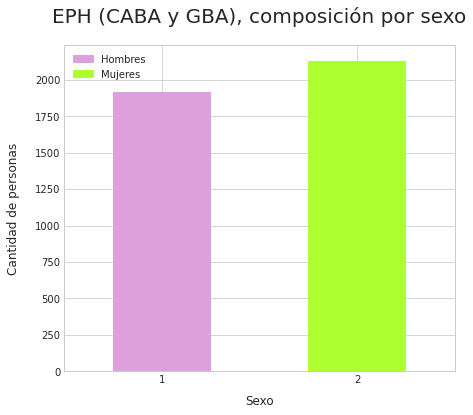

In [38]:
#Gráfico de barras que muestra la composición de la muestra por sexo:
with plt.style.context('seaborn-whitegrid'):
    eph_2021_c.groupby('CH04').count()['CODUSU'].plot(kind='bar', color=('plum', 'greenyellow'),figsize=(7, 6), rot=0)
    plt.xlabel('Sexo',labelpad=10,fontsize='12')
    plt.ylabel('Cantidad de personas',labelpad=15, fontsize='12')
    plt.title('EPH (CABA y GBA), composición por sexo', y=1.05, fontsize='20')
    colors ={'Hombres':'plum','Mujeres':'greenyellow'}
    labels = list(colors.keys())
    handles = [plt.Rectangle((1,1),0.5,0.5, color=colors[label]) for label in labels]
    plt.legend(handles, labels)

# Guardamos el gráfico: 
plt.savefig("Figurafinal2c.jpg", bbox_inches='tight')

##### 2.d

In [39]:
# Armamos una matriz con las variables que usaremos para hacer la matriz de correlaciones: 
eph_d=eph_2021_c.loc[:,['CH04','CH07', 'CH08', 'NIVEL_ED', 'CAT_INAC', 'IPCF']]

In [40]:
# 
n_colors = 25 # Use 256 colors for the diverging color palette
palette = sns.diverging_palette(20, 2, n=n_colors) # Create the palette
color_min, color_max = [-1, 1] # Range of values that will be mapped to the palette, i.e. min and max possible correlation


def value_to_color(val):
    val_position = float((val - color_min)) / (color_max - color_min) # position of value in the input range, relative to the length of the input range
    ind = int(val_position * (n_colors - 1)) # target index in the color palette
    return palette[ind]


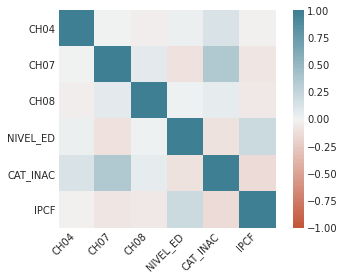

In [41]:
# Elegimos uno de los siguientes gráficos y guardar la figura:

with plt.style.context('seaborn-whitegrid'):
    corr = eph_d.corr()
    ax = sns.heatmap(
        corr, 
        vmin=-1, vmax=1, center=0,
        cmap=sns.diverging_palette(20, 220, n=200),
        square=True
    
    )
    ax.set_xticklabels(
        ax.get_xticklabels(),
        rotation=45,
        horizontalalignment='right'
    
    );

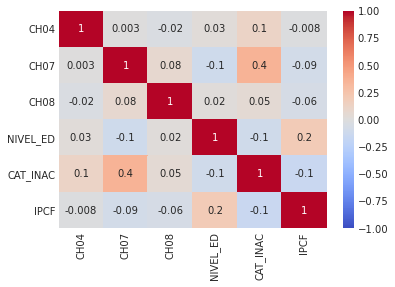

In [42]:
with plt.style.context('seaborn-whitegrid'):
    sns.heatmap(eph_d.corr(), annot = True, fmt='.1g',vmin=-1, vmax=1, center= 0, cmap= 'coolwarm')


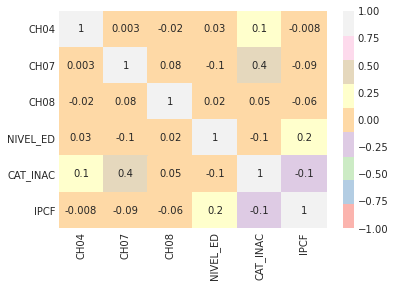

In [43]:
with plt.style.context('seaborn-whitegrid'):
    sns.heatmap(eph_d.corr(), annot = True, fmt='.1g',vmin=-1, vmax=1, center= 0, cmap= 'Pastel1') #### presentamos este gráfico
# Guardamos el gráfico: 
plt.savefig("Figurafinal2d.jpg", bbox_inches='tight')

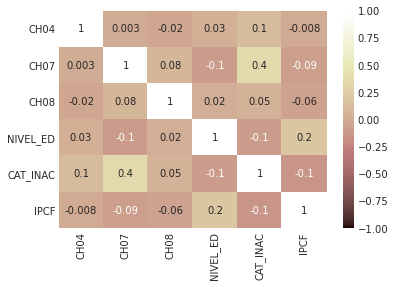

In [44]:
with plt.style.context('seaborn-whitegrid'):
    sns.heatmap(eph_d.corr(), annot = True, fmt='.1g',vmin=-1, vmax=1, center= 0, cmap= 'pink')


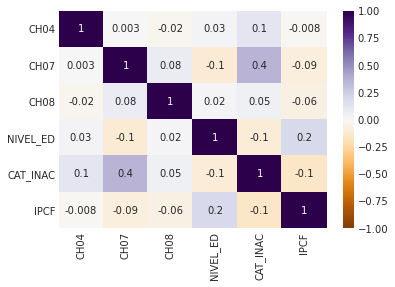

In [45]:
with plt.style.context('seaborn-whitegrid'):
    sns.heatmap(eph_d.corr(), annot = True, fmt='.1g',vmin=-1, vmax=1, center= 0, cmap= 'PuOr')


##### 2.e

In [46]:
# Queremos saber cuántos desocupados en la muestra. Sabemos que la variable 
# "Estado" es la que contiene dicha información. 
lista_estados = list(set(eph_2021_c['ESTADO']))
lista_estados


[0, 1, 2, 3, 4]

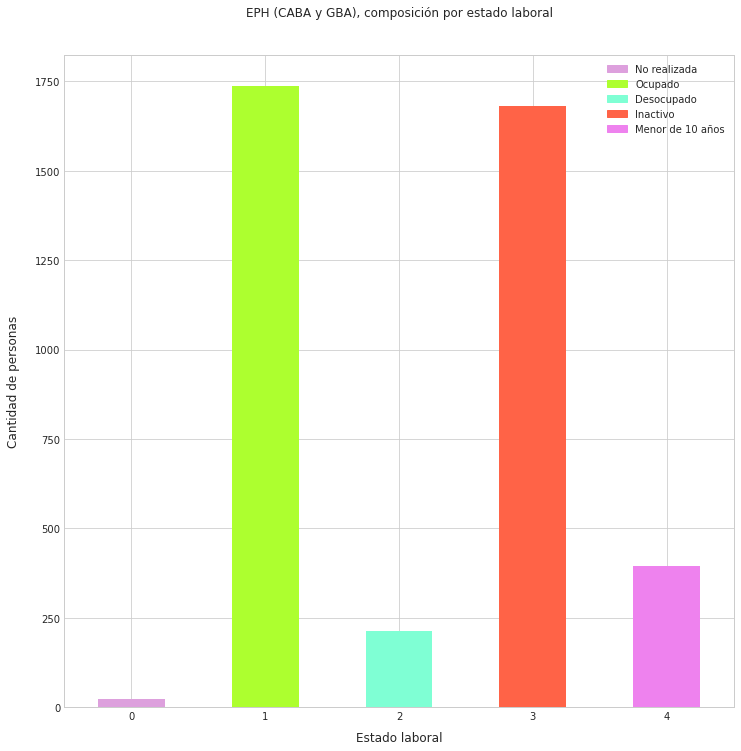

In [47]:
# Esta variable puede tomar 5 valores (0-4). Si toma un valor
# igual a 2 indica que la persona está desocupada. 


# Antes de averiguar cuántos desocupados hay, consideramos interesante 
# realizar un histograma con los valores que toma la variable "Estado": 
with plt.style.context('seaborn-whitegrid'):
    eph_2021_c.groupby('ESTADO').count()['CODUSU'].plot(kind='bar', color=('plum', 'greenyellow','aquamarine','tomato','violet'),figsize=(12, 12), rot=0)
    plt.xlabel('Estado laboral',labelpad=10,fontsize='12')
    plt.ylabel('Cantidad de personas',labelpad=15, fontsize='12')
    plt.title('EPH (CABA y GBA), composición por estado laboral', y=1.05)
    colors ={'No realizada':'plum','Ocupado':'greenyellow','Desocupado':'aquamarine','Inactivo':'tomato','Menor de 10 años':'violet'}
    labels = list(colors.keys())
    handles = [plt.Rectangle((0,0),0.5,0.5, color=colors[label]) for label in labels]
    plt.legend(handles, labels)
    
# Guardamos el gráfico: 
# Guardamos el gráfico: 
plt.savefig("Figurafinal2e.jpg", bbox_inches='tight')

In [48]:
# Con el siguiente código podemos conocer cuál es la cantidad de desocupados
# y de inactivos:

eph_2021_c.groupby('ESTADO').agg({'ESTADO': ['count']})

,ESTADO
,count
ESTADO,
0,23
1,1737
2,213
3,1682
4,394


In [49]:
# Con el siguiente código podemos conocer cuál es la cantidad de desocupados
# y de inactivos, y además conocer cuál es la media de ingreso per cápita
# familiar según el valor que toma la variable ESTADO. 
# Para esto usamos el comando visto en clase: 
# df.groupby(by=lista columnas agrupamiento).agg(dict var func)
eph_2021_c[['ESTADO', 'IPCF']].groupby('ESTADO').agg({'IPCF':["mean", "count"]})

IPCF      
                mean count
ESTADO                    
0           0.000000    23
1       23384.514980  1737
2       11920.305164   213
3       16739.573775  1682
4       12389.373426   394

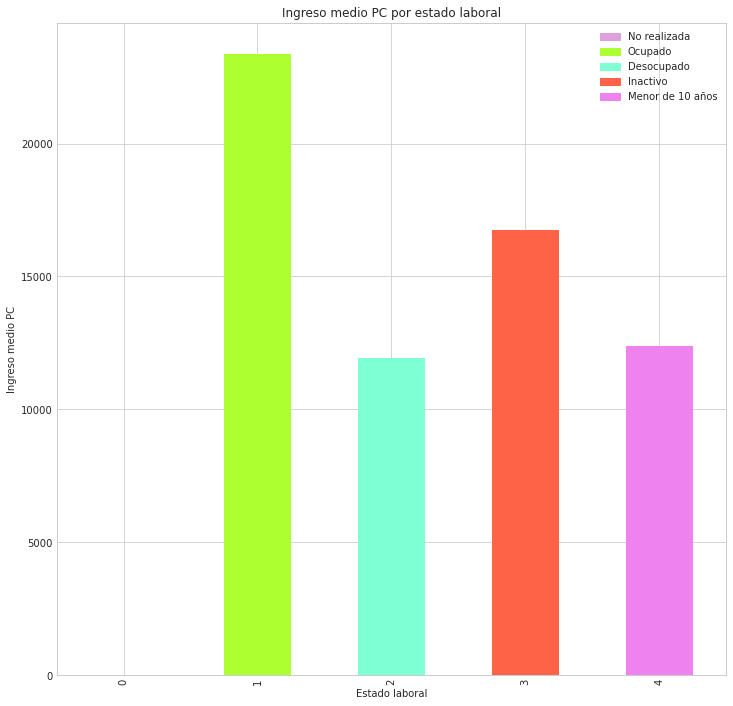

In [50]:
# La siguiente figura representa de forma gráfica la información obtenida 
# en la línea anterior: 
with plt.style.context('seaborn-whitegrid'):    
    df = eph_2021_c.replace(np.nan, 0)
    dfg = eph_2021_c.groupby(['ESTADO'])['IPCF'].mean()
    dfg.plot(kind='bar', title='Ingreso medio PC por estado laboral', ylabel='Ingreso medio PC', xlabel='Estado laboral', figsize=(12, 12),color=('plum', 'greenyellow','aquamarine','tomato','violet'))
    colors ={'No realizada':'plum','Ocupado':'greenyellow','Desocupado':'aquamarine','Inactivo':'tomato','Menor de 10 años':'violet'}
    labels = list(colors.keys())
    handles = [plt.Rectangle((0,0),0.5,0.5, color=colors[label]) for label in labels]
    plt.legend(handles, labels)
    
# Guardamos el gráfico: 
plt.savefig("Figurafinal2e2.jpg", bbox_inches='tight')


##### 2.f

In [51]:
# Utilizando el archivo tabla_adulto_equiv.xlsx, agregue una columna a su

#base de datos llamada adulto_equiv que contenga los valores de adulto equi-
#valente de cada persona según su sexo y edad (por ejemplo, a un varón de 2

#años le corresponde 0.46). Finalmente, con el comando groupby sume esta nueva
#columna para las personas que pertenecen a un mismo hogar y guarde ese dato
#en una columna llamada ad_equiv_hogar1


In [52]:
equivalencia=pd.read_excel('tabla_adulto_equiv.xlsx')

In [53]:
# Guardamos los valores de las celdas en las listas 
equivalencia_filas=equivalencia.to_numpy().transpose().tolist()

In [54]:
# La idea es crear dos bases de datos distintas para luego hacer el merge con la EPH. 
# Estas dos bases de van a diferenciar en una variable "sexo" que tomará, para todas las observaciones, 
# un valor de 1 o 2. 

# En primer lugar, procederemos a armar la primera fila de los dos data frame
# Esta fila tendrá los valores referidos a la edad, es por esto que es una fila en común 
# entre ambas bases de datos. 

# Nos quedamos con el primer elemento de "equivalencia_filas" (edad):

fila0=equivalencia_filas[0]

# Nos quedamos solo con los valores que no son missings:

edad = [x for x in fila0 if pd.isnull(x) == False]

# Armamos la base de datos para las mujeres

# Nos quedamos solo con los elementos de la fila que nos van a servir (hay algunos 
# datos de edad que no son missing pero no son referidos a la edad sino que son notas)

edad=edad[1:24]

print(edad)

# Nos quedamos con la fila referida a la equivalencia:

fila1=equivalencia_filas[1]

mujeres_eq = [x for x in fila1 if pd.isnull(x) == False]

# Nos quedamos solo con los elementos de la fila que nos van a servir 

mujeres_eq=mujeres_eq[1:24]

print(mujeres_eq)

# Creamos una fila que tome valor igual a 2, esto será para luego poder hacer el merge 
# con la base de datos de la EPH

sexo=[2] * 24

print(sexo)

# Juntamos las filas y las transformamos en un data frame. 

mujeres = list(zip(edad, mujeres_eq, sexo))

# Cambiamos los nombres de las variables para que podamos hacer el merge con la EPH sin ninguna complicación

df_mujeres = pd.DataFrame(mujeres,columns=['edad','equivalencia','CH04'])

# Observamos el resultado

df_mujeres.head(5)


['Menor de 1 año', '1año', '2 años', '3 años', '4 años', '5 años', '6 años', '7 años', '8 años', '9 años', '10 años', '11 años', '12 años', '13 años', '14 años', '15 años', '16 años', '17 años', '18 a 29 años', '30 a 45 años', '46 a 60 años', '61 a 75 años', 'más de 75 años']
[0.35, 0.37, 0.46, 0.51, 0.55, 0.6, 0.64, 0.66, 0.68, 0.69, 0.7, 0.72, 0.74, 0.76, 0.76, 0.77, 0.77, 0.77, 0.76, 0.77, 0.76, 0.67, 0.63]
[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]


,edad,equivalencia,CH04
0,Menor de 1 año,0.35,2
1,1año,0.37,2
2,2 años,0.46,2
3,3 años,0.51,2
4,4 años,0.55,2


In [55]:
# Armamos la base de datos para los hombres 

# Nos quedamos solo con los elementos de la fila que nos van a servir 

fila1_hombres=equivalencia_filas[2]

# Eliminamos los missing values

# esto sería: hombres_eq = [x for x in fila1_hombres (cambia esto) if pd.isnull(x) == False]

hombres_eq = [x for x in fila1_hombres if pd.isnull(x) == False]

# Nos quedamos solo con los elementos de la fila que nos van a servir 

hombres_eq = hombres_eq[1:24]

print(hombres_eq)

# Creamos una fila que tome valor igual a 1, esto será para luego poder hacer el merge 
# con la base de datos de la EPH

sexo=[1] * 24

print(sexo)

# Juntamos las filas y las transformamos en un data frame. 

hombres = list(zip(edad, hombres_eq, sexo))

# Cambiamos los nombres de las variables para que podamos hacer el merge con la EPH sin ninguna complicación

df_hombres = pd.DataFrame(hombres,columns=['edad','equivalencia','CH04'])

# Observamos el resultado

df_hombres.head(5)


[0.35, 0.37, 0.46, 0.51, 0.55, 0.6, 0.64, 0.66, 0.68, 0.69, 0.7, 0.72, 0.74, 0.76, 0.76, 0.77, 0.77, 0.77, 0.76, 0.77, 0.76, 0.67, 0.63]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


,edad,equivalencia,CH04
0,Menor de 1 año,0.35,1
1,1año,0.37,1
2,2 años,0.46,1
3,3 años,0.51,1
4,4 años,0.55,1


In [70]:
# F.
# Creamos una función que nos 
def combinacion_edad(x):
   
    #Esta función nos devuelve la categoría en la que entra cada individuo
    #según la edad que tenga, con categoría nos ayudará a hacer el match 
    #de la base de datos de la EPH con la tabla de equivalencias
    #Input: 
    #  edad (int): la edad a la que se desea transformar en esa misma edad solo que "con palabras"
    # Output:
    #  str: edad en palabras

    if x < 1:
        return 'Menor de 1 año'
    elif x == 1:
        return '1 año'
    elif x ==2: 
        return '2 años'
    elif x ==3: 
        return '3 años'
    elif x ==4: 
        return '4 años'
    elif x ==5: 
        return '5 años'
    elif x ==6: 
        return '6 años'
    elif x ==7: 
        return '7 años'
    elif x ==8: 
        return '8 años'
    elif x ==9: 
        return '9 años'
    elif x ==10: 
        return '10 años'
    elif x ==11: 
        return '11 años'
    elif x ==12: 
        return '12 años'
    elif x ==13: 
        return '13 años'
    elif x ==14: 
        return '14 años'
    elif x ==15: 
        return '15 años'
    elif x ==16: 
        return '16 años'
    elif x ==17: 
        return '17 años'      
    elif x >= 18 and x <= 29:
        return '18 a 29 años'
    elif x >= 30 and x <= 45:
        return '30 a 45 años'  
    elif x >= 46 and x <= 60:
        return '46 a 60 años'    
    elif x >= 61 and x <= 75:
        return '61 a 75 años'
    else:
        return 'mas de 75 años'



In [71]:
# Agregamos una nueva columna con la edad, en donde aplicamos la función 
eph_2021_c['edad']=[combinacion_edad(x) for x in eph_2021_c['CH06']]

eph_2021_c.head(500)

<ipython-input-71-0ca98e696ed0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eph_2021_c['edad']=[combinacion_edad(x) for x in eph_2021_c['CH06']]


,CODUSU,ANO4,TRIMESTRE,NRO_HOGAR,COMPONENTE,H15,REGION,MAS_500,AGLOMERADO,PONDERA,...,ADECIFR,IPCF,DECCFR,IDECCFR,RDECCFR,GDECCFR,PDECCFR,ADECCFR,PONDIH,edad
36799,TQRMNOPPRHKMLNCDEIIAD00655703,2021,1,1,1,1,1,S,32,1394,...,10.0,127500.0,10.0,0.0,10.0,10.0,0.0,10.0,2494,18 a 29 años
36800,TQRMNOPPRHKMLNCDEIIAD00655703,2021,1,1,2,1,1,S,32,1394,...,10.0,127500.0,10.0,0.0,10.0,10.0,0.0,10.0,2494,18 a 29 años
36801,TQRMNOPPWHKMNUCDEIIAD00655837,2021,1,1,1,1,1,S,32,3090,...,12.0,0.0,12.0,0.0,12.0,12.0,0.0,12.0,0,46 a 60 años
36802,TQRMNOPPWHKMNUCDEIIAD00655837,2021,1,1,2,1,1,S,32,3090,...,12.0,0.0,12.0,0.0,12.0,12.0,0.0,12.0,0,46 a 60 años
36803,TQRMNOPPWHKMNUCDEIIAD00655837,2021,1,1,3,1,1,S,32,3090,...,12.0,0.0,12.0,0.0,12.0,12.0,0.0,12.0,0,18 a 29 años
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37298,TQRMNORQSHLKKUCDEIIAD00650547,2021,1,1,1,1,1,S,32,846,...,3.0,50000.0,9.0,0.0,9.0,9.0,0.0,7.0,1086,30 a 45 años
37299,TQRMNORQTHJKMSCDEIIAD00700215,2021,1,1,2,1,1,S,32,2449,...,12.0,0.0,12.0,0.0,12.0,12.0,0.0,12.0,0,30 a 45 años
37300,TQRMNORQTHJKMSCDEIIAD00700215,2021,1,1,3,1,1,S,32,2449,...,12.0,0.0,12.0,0.0,12.0,12.0,0.0,12.0,0,30 a 45 años
37301,TQRMNORQTHJKMSCDEIIAD00700215,2021,1,1,1,1,1,S,32,2449,...,12.0,0.0,12.0,0.0,12.0,12.0,0.0,12.0,0,61 a 75 años


In [72]:
# Hacemos el merge de la EPH con la base de datos de equivalencia para mujeres

result = pd.merge(eph_2021_c, df_hombres, how="left", on=["edad","CH04"])



In [73]:
# Hacemos el merge de la EPH con la base de datos de equivalencia para hombres

result_eph = pd.merge(result, df_mujeres, how="left", on=["CH04", "edad"])

In [74]:
# Debido a que queremos tener los datos de equivalencia en una sola columna juntamos los datos de "equivalencia_x" y "equivalencia_y"
# en una sola columna. Notar que si hay valores missing en ambas columnas esto se mantiene en la nueva columna llamada "Equivalencia"

result_eph["Equivalencia"]=result_eph["equivalencia_x"].combine_first(result_eph["equivalencia_y"])

In [75]:
# Observamos los resultados 

result_eph.head()

,CODUSU,ANO4,TRIMESTRE,NRO_HOGAR,COMPONENTE,H15,REGION,MAS_500,AGLOMERADO,PONDERA,...,IDECCFR,RDECCFR,GDECCFR,PDECCFR,ADECCFR,PONDIH,edad,equivalencia_x,equivalencia_y,Equivalencia
0,TQRMNOPPRHKMLNCDEIIAD00655703,2021,1,1,1,1,1,S,32,1394,...,0.0,10.0,10.0,0.0,10.0,2494,18 a 29 años,0.76,NaN,0.76
1,TQRMNOPPRHKMLNCDEIIAD00655703,2021,1,1,2,1,1,S,32,1394,...,0.0,10.0,10.0,0.0,10.0,2494,18 a 29 años,NaN,0.76,0.76
2,TQRMNOPPWHKMNUCDEIIAD00655837,2021,1,1,1,1,1,S,32,3090,...,0.0,12.0,12.0,0.0,12.0,0,46 a 60 años,0.76,NaN,0.76
3,TQRMNOPPWHKMNUCDEIIAD00655837,2021,1,1,2,1,1,S,32,3090,...,0.0,12.0,12.0,0.0,12.0,0,46 a 60 años,NaN,0.76,0.76
4,TQRMNOPPWHKMNUCDEIIAD00655837,2021,1,1,3,1,1,S,32,3090,...,0.0,12.0,12.0,0.0,12.0,0,18 a 29 años,NaN,0.76,0.76


In [76]:

# El archivo de consideraciones metodológicas del INDEC sobre la EPH nos dice que para agrupar por edades necesitamos usar 
# CODUSO y NRO_HOGAR. 

# Armamos una nueva base de datos que contenga las variables CODUSU, NRO_HOGAR y Equivalencia y las agrupamos por CODUSO y NRO_HOGAR
eph_equiv = result_eph[['CODUSU', 'NRO_HOGAR', 'Equivalencia']].groupby(['CODUSU', 'NRO_HOGAR']).sum().reset_index()
# Le damos el nombre a las columnas del data frame anterior
eph_equiv.rename(columns = {'Equivalencia': 'ad_equiv_hogar'}, inplace = True) 

# Unimos las base anterior con la base completa (result_eph), de esta forma, cada individuo tiene el valor correspondiente 
# de eph equiv por familia
eph_final = pd.merge(result_eph, eph_equiv, how='left', on=['CODUSU', 'NRO_HOGAR'])

##### 3

In [77]:
#Uno de los grandes problemas de la EPH es la creciente cantidad de hogares que
# no reportan sus ingresos (ver por ejemplo el siguiente informe). ¿Cuántas perso-
# nas no respondieron cuál es su ingreso total familiar (ITF)? Guarde como una
# base distinta las observaciones donde respondieron la pregunta sobre su ITF bajo
# el nombre respondieron. Las observaciones con ITF=0 guárdelas bajo el nombre
# norespondieron.

# Las personas que no respondieron cuál es su ingreso total familiar: 

(eph_final['ITF']==0).sum() # 1549



1549

In [78]:
(eph_final['ITF']>0).sum() # 2500


2500

In [79]:

# Guardamos como bases distintas según si respondieron o no ITF
respondieron = eph_final.loc[eph_final['ITF']>0]

no_respondieron = eph_final.loc[eph_final['ITF']==0]

##### 4 

In [80]:
# Creamos la variable ingreso_necesario en la base de datos "respondieron", esta variable resulta de multiplicar 
# 18914 por cada valor de "ad_equiv_hogar"

respondieron['ingreso_necesario']=18914*respondieron['ad_equiv_hogar']

# Observamos los resultados

respondieron.head(4)



<ipython-input-80-64a87fa95155>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  respondieron['ingreso_necesario']=18914*respondieron['ad_equiv_hogar']


,CODUSU,ANO4,TRIMESTRE,NRO_HOGAR,COMPONENTE,H15,REGION,MAS_500,AGLOMERADO,PONDERA,...,GDECCFR,PDECCFR,ADECCFR,PONDIH,edad,equivalencia_x,equivalencia_y,Equivalencia,ad_equiv_hogar,ingreso_necesario
0,TQRMNOPPRHKMLNCDEIIAD00655703,2021,1,1,1,1,1,S,32,1394,...,10.0,0.0,10.0,2494,18 a 29 años,0.76,NaN,0.76,1.52,28749.28
1,TQRMNOPPRHKMLNCDEIIAD00655703,2021,1,1,2,1,1,S,32,1394,...,10.0,0.0,10.0,2494,18 a 29 años,NaN,0.76,0.76,1.52,28749.28
9,TQRMNOPPXHLLLNCDEIIAD00690221,2021,1,1,1,1,1,S,32,3745,...,8.0,0.0,6.0,7389,61 a 75 años,0.67,NaN,0.67,2.10,39719.40
10,TQRMNOPPXHLLLNCDEIIAD00690221,2021,1,1,3,1,1,S,32,3745,...,8.0,0.0,6.0,7389,18 a 29 años,0.76,NaN,0.76,2.10,39719.40


In [81]:
# Calculamos la media de la variable ingreso necesario 

respondieron['ingreso_necesario'].mean()


45598.854728000355

In [82]:
# Calculamos la media de la variable ITF

respondieron['ITF'].mean()


88168.4864

##### 5

In [83]:
# Por último, agregue a respondieron una columna llamada pobre que tome valor 1 si
# ingreso_necesario es menor al ITF que reportó esa familia, y 0 en caso contrario.
# ¿Cuántos pobres identificó?

In [84]:
# Creamos la variable pobre: 

# En principio solo toma como valor cero

respondieron['pobres']=0

# Reemplazamos con 1 en la variable 'pobre' si el ingreso necesario es menor al ITF que se respondió en la encuesta

respondieron.loc[respondieron.ingreso_necesario > respondieron.ITF, 'pobres']=1




<ipython-input-84-cd2a7abade30>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  respondieron['pobres']=0
C:\Users\Abi\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [85]:
# Calculamos la cantidad de pobres: 

respondieron['pobres'].value_counts()



0    1805
1     695
Name: pobres, dtype: int64

In [86]:
# Generamos una tabla de estadística descriptiva de la variable pobres 

respondieron['pobres'].describe()

count    2500.000000
mean        0.278000
std         0.448103
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: pobres, dtype: float64

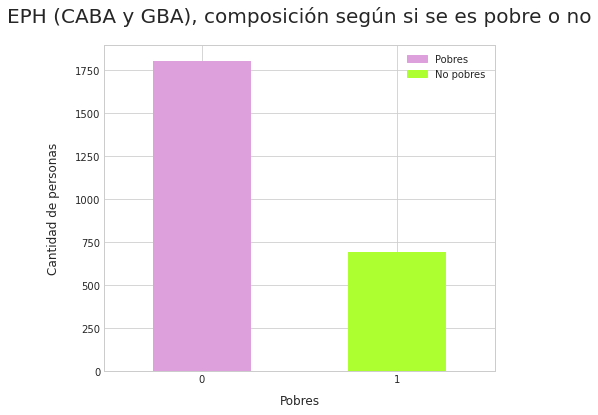

In [87]:
#Gráfico de barras que muestra la composición de la muestra por sexo:
with plt.style.context('seaborn-whitegrid'):
    respondieron.groupby('pobres').count()['CODUSU'].plot(kind='bar', color=('plum', 'greenyellow'),figsize=(7, 6), rot=0)
    plt.xlabel('Pobres',labelpad=10,fontsize='12')
    plt.ylabel('Cantidad de personas',labelpad=15, fontsize='12')
    plt.title('EPH (CABA y GBA), composición según si se es pobre o no', y=1.05, fontsize='20')
    colors ={'Pobres':'plum','No pobres':'greenyellow'}
    labels = list(colors.keys())
    handles = [plt.Rectangle((1,1),0.5,0.5, color=colors[label]) for label in labels]
    plt.legend(handles, labels)

# Guardamos el gráfico: 
plt.savefig("Figurafinal5.jpg", bbox_inches='tight')

### Parte 2: Clasificación

In [148]:
# Importo paquetes a utilizar
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import plot_roc_curve
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from scipy.special import expit
import statsmodels.api as sm
from sklearn import preprocessing

##### 1

In [149]:
# Elimino variables de la base final y también de las bases 
# "respondieron" y "no respondieron"
a = ['PP08D1','PP08D4','PP08F1','PP08F2','PP08J2','PP08J3',
    'P21','DECOCUR','IDECOCUR','RDECOCUR','GDECOCUR','PDECOCUR','ADECOCUR','PONDIIO','TOT_P12',    
    'P47T','DECINDR','PONDII',
    'V2_M','V3_M','V4_M','V5_M','V8_M','V9_M','V10_M','V11_M','V12_M','V18_M','V19_AM','V21_M','T_VI',
    'ITF','DECIFR','IPCF','DECCFR','PONDIH','Equivalencia','ad_equiv_hogar', 'edad']
b = a + ['ingreso_necesario']

eph_final = eph_final.drop(columns = a)
respondieron = respondieron.drop(columns = b)
no_respondieron = no_respondieron.drop(columns = a)

# Reemplazo los NaN por ceros en la base "respondieron"
respondieron=respondieron.fillna(0)

##### 2 y 3

In [150]:
# Antes de dividir a la base "respondieron" en base de prueba y entrenamiento, establezco a la 
# variable pobres como variable dependiente, y a todas las demás como independientes (matriz X).
# También agrego un vector de constantes a la matriz X
y = respondieron['pobres'] 
X = respondieron[respondieron.columns.difference(['pobres','ANO4', 'level_0', 'index', 'CODUSU', 'TRIMESTRE', 'NRO_HOGAR', 'CH05', ' COMPONENTE', 'H15',
                                                 'REGION', 'MAS_500', ' AGLOMERADO', 'PONDERA', 'CH15_COD', 'CH16_COD', 'ADECCFR', 'ADECIFR', 'IDECCFR',
                                                 'IDECIFR', 'IDECINDR', 'RDECCFR', 'RDECIFR', 'PP09A_ESP'])]
X = sm.add_constant(X) 

In [151]:
# Divido a la base respondieron en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

##### 4

In [152]:
# Modelo de Regresión logística
log_reg = LogisticRegression().fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

C:\Users\Flor\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [153]:
# Matriz de confusión y accuracy score
matriz_confusion = confusion_matrix(y_test, y_pred)
print('Confusion Matrix :')
print(matriz_confusion) 
print('La precisión del modelo es:',accuracy_score(y_test, y_pred))

Confusion Matrix :
[[457 100]
 [ 85 108]]
La precisión del modelo es: 0.7533333333333333


In [154]:
#Calculamos el área bajo la curva ROC
auc = roc_auc_score(y_test, y_pred)
print('AUC: %.2f' % auc)

AUC: 0.69


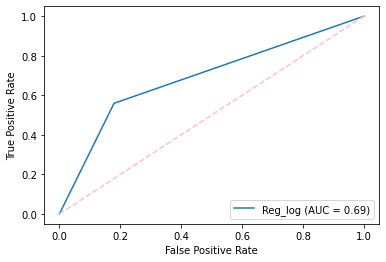

In [155]:
# Graficamos la curva ROC y la línea de 45 grados
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=auc, estimator_name='Reg_log')
display.plot()  
plt.plot([0, 1], [0, 1], color='pink', linestyle='--')
plt.show() 

In [156]:
# Otro método para calcular la probabilidad de ser pobre: Análisis discriminante
lda = LinearDiscriminantAnalysis()
lda = lda.fit(X_train, y_train)
y_pred_lda=lda.predict(X_test)

In [157]:
# Matriz de confusión y accuracy score
conf_lda = confusion_matrix(y_test, y_pred_lda)
print('Confusion Matrix :')
print(conf_lda) 
print('La precisión del modelo es: %.2f',accuracy_score(y_test, y_pred_lda))

Confusion Matrix :
[[517  40]
 [ 22 171]]
La precisión del modelo es: %.2f 0.9173333333333333


In [158]:
#Calculamos el área bajo la curva ROC
auc_lda = roc_auc_score(y_test, y_pred_lda)
print('AUC: %.2f' % auc_lda)

AUC: 0.91


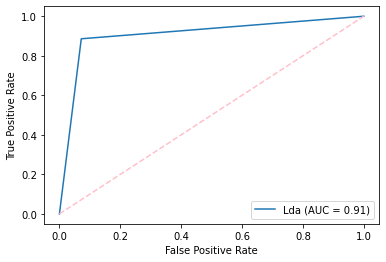

In [159]:
# Graficamos la curva ROC y la línea de 45 grados
fpr, tpr, thresholds = roc_curve(y_test, y_pred_lda)    
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=auc_lda, estimator_name='Lda')
display.plot()  
plt.plot([0, 1], [0, 1], color='pink', linestyle='--')
plt.show() 

In [160]:
# Otro método para calcular la probabilidad de ser pobre: Modelo de K vecinos cercanos:

# Además de calcular el modelo para k=3, vamos a verificar cuál es la cantidad de vecinos 
# cercanos maximiza el "testing accuracy" (una medida de precisión en la predicción)
k_range = range(1,10)
scores = {}      # Para guardar la precisión en un diccionario
scores_list = [] # Para guardar la precisión en una lista
for k in k_range:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        y_pred_knn = knn.predict(X_test)
        scores[k] = accuracy_score(y_test, y_pred_knn)
        scores_list.append(accuracy_score(y_test, y_pred_knn))

In [161]:
scores

{1: 0.8186666666666667,
 2: 0.8386666666666667,
 3: 0.8426666666666667,
 4: 0.844,
 5: 0.8386666666666667,
 6: 0.8493333333333334,
 7: 0.8453333333333334,
 8: 0.844,
 9: 0.8493333333333334}

Text(0, 0.5, 'Testing Accuracy')

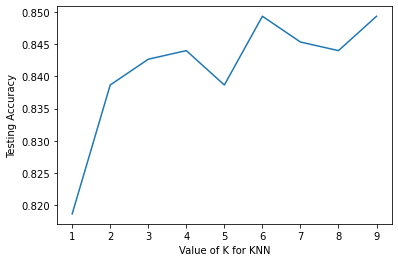

In [162]:
# Graficamos la precisión en base a la cantidad de vecinos:
plt.plot(k_range, scores_list)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

#k=9 es la cantidad de vecinos que maximiza la precisión

In [163]:
# Modelo de KNN con k=9
knn = KNeighborsClassifier(n_neighbors=9, metric='euclidean')
knn.fit(X_train, y_train) 
y_pred_knn = knn.predict(X_test)

In [164]:
# Matriz de confusión y accuracy score
knn_confusion = confusion_matrix(y_test, y_pred_knn)
print(knn_confusion)
print('La precisión del modelo es:',accuracy_score(y_test, y_pred_knn))

[[516  41]
 [ 72 121]]
La precisión del modelo es: 0.8493333333333334


In [165]:
# Calculamos el área bajo la curva ROC
auc_knn = roc_auc_score(y_test, y_pred_knn)
print('AUC: %.2f' % auc_knn)

AUC: 0.78


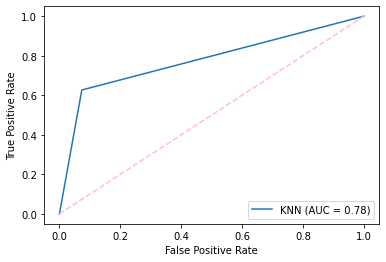

In [166]:
# Graficamos la curva ROC y la línea de 45 grados
fpr, tpr, thresholds = roc_curve(y_test, y_pred_knn)   
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=auc_knn, estimator_name='KNN')
display.plot()  
plt.plot([0, 1], [0, 1], color='pink', linestyle='--')
plt.show() 

In [167]:
# Ahora vamos a calcular el modelo con k=3
knn = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
knn.fit(X_train, y_train) 
y_pred_knn_3 = knn.predict(X_test)

In [168]:
# Matriz de confusión y accuracy score
knn_confusion_3 = confusion_matrix(y_test, y_pred_knn_3)
print(knn_confusion_3)
print('La precisión del modelo es:',accuracy_score(y_test, y_pred_knn_3))

[[507  50]
 [ 68 125]]
La precisión del modelo es: 0.8426666666666667


In [169]:
# Calculamos el área bajo la curva ROC
auc_knn_3 = roc_auc_score(y_test, y_pred_knn_3)
print('AUC: %.2f' % auc_knn_3)

AUC: 0.78


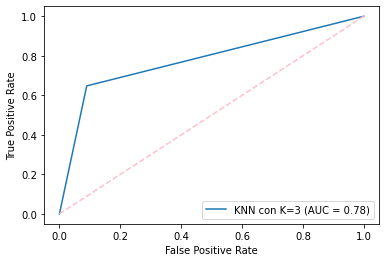

In [170]:
# Graficamos la curva ROC y la línea de 45 grados
fpr, tpr, thresholds = roc_curve(y_test, y_pred_knn_3)   
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=auc_knn_3, estimator_name='KNN con K=3')
display.plot()  
plt.plot([0, 1], [0, 1], color='pink', linestyle='--')
plt.show() 

#### 5

In [171]:
# Vamos a calcular de forma adicional otra medida de precisión: el error cuadrático medio
y_pred= pd.Series(y_pred.tolist())
y_pred_lda = pd.Series(y_pred_lda.tolist())
y_pred_knn = pd.Series(y_pred_knn.tolist())

In [172]:
# Calculamos ECM de Logit:
ecml = (np.sum((y_pred - y_train)**2))/100
print(f'El ECM para el modelo Logit es {ecml}')

# Calculamos ECM de Analisis Discriminante Lineal:
ecmlda = (np.sum((y_pred_lda - y_train)**2))/100
print(f'El ECM para el modelo de Analisis Discriminante Lineal es {ecmlda}')

# Calculamos ECM de KNN con k=3:
ecmknn = (np.sum((y_pred_knn - y_train)**2))/100
print(f'El ECM para el modelo de Vecinos Cercano con k = 3 es {ecmknn}')

El ECM para el modelo Logit es 1.12
El ECM para el modelo de Analisis Discriminante Lineal es 1.14
El ECM para el modelo de Vecinos Cercano con k = 3 es 0.99


#### 6

In [173]:
#Eliminamos de la base "no_respondieron" las variables que habíamos desechado en "respondieron"
no_respondieron = no_respondieron[respondieron.columns.difference(['pobres','ANO4', 'level_0', 'index', 'CODUSU', 'TRIMESTRE', 'NRO_HOGAR', 'CH05', ' COMPONENTE', 'H15',
                                                 'REGION', 'MAS_500', ' AGLOMERADO', 'PONDERA', 'CH15_COD', 'CH16_COD', 'ADECCFR', 'ADECIFR', 'IDECCFR',
                                                 'IDECIFR', 'IDECINDR', 'RDECCFR', 'RDECIFR', 'PP09A_ESP'])]
no_respondieron  = sm.add_constant(no_respondieron)

In [174]:
# Reemplazo los NaN por ceros en la base "no respondieron"
no_respondieron=no_respondieron.fillna(0)

In [175]:
# Volvemos a correr el método de análisis discriminante
lda = LinearDiscriminantAnalysis()
lda = lda.fit(X_train, y_train)

In [176]:
#Predecimos cantidad de pobres en la base no respondieron
y_pred_lda_2=lda.predict(no_respondieron)

In [177]:
# Aplicamos la regla de bayes
y_pred_lda_2=np.where(y_pred_lda_2>0.5, 1, y_pred_lda_2)
y_pred_lda_2=np.where(y_pred_lda_2<=0.5, 0, y_pred_lda_2)

In [178]:
#Contamos la cantidad de pobres predecidos en la base "no respondieron"
y_pred_lda_2 = pd.Series(y_pred_lda_2.tolist())
y_pred_lda_2.value_counts()

0    1508
1      41
dtype: int64

#### 7

In [179]:
# Dropeamos algunos predictores que pensamos que no aportan significativamente al poder
# predictivo de los distintos modelo
vars_drop= ['CAT_INAC','CH09', 'CH10', 'CH16','COMPONENTE','ESTADO','IMPUTA','PP02C2','PP02C3',
          'PP02C4','PP02C5','PP02C6','PP02C7','PP02C8','PP02E','PP02H','PP02I']

X_test = X_test.drop(columns = vars_drop)
X_train = X_train.drop(columns = vars_drop)

In [180]:
# Calculamos la regresión logística nuevamente con la nueva matriz X
log_reg_2 = LogisticRegression().fit(X_train, y_train)
y_pred_3 = log_reg_2.predict(X_test)

C:\Users\Flor\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [181]:
# Matriz de confusión y accuracy score
matriz_confusion_2 = confusion_matrix(y_test, y_pred_3)

print('Confusion Matrix :')
print(matriz_confusion_2) 
print('Accuracy Score :',accuracy_score(y_test, y_pred_3))

Confusion Matrix :
[[458  99]
 [ 84 109]]
Accuracy Score : 0.756


In [182]:
# Calculamos el área bajo la curva ROC
auc_2 = roc_auc_score(y_test, y_pred_3)
print('AUC: %.2f' % auc_2)

AUC: 0.69


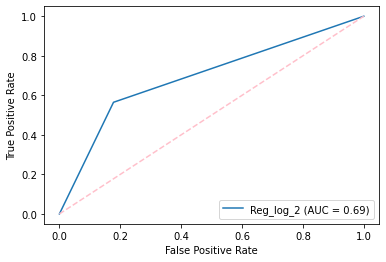

In [183]:
# Graficamos la curva ROC y la línea de 45 grados
fpr, tpr, thresholds = roc_curve(y_test, y_pred_3)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=auc_2, estimator_name='Reg_log_2')
display.plot()  
plt.plot([0, 1], [0, 1], color='pink', linestyle='--')
plt.show() 